
#Graph methods for imaging, Vision and computing (B31RX) 2023

##Tutorial 3: SLIC and Normalised Cut


In this tutorial, we will use implementations for two algorithms seen during the
lectures: Simple Linear Iterative Clustering (SLIC) and Normalised Cut (NCut).

NCut is hard to apply directly at the pixel level due to its high computational cost. In
this tutorial, we will first use SLIC to create regions of homogeneous colours and
then apply NCut to the regions identified to create larger classes.


In [ ]:
!pip install scikit-image==0.22

# import os

# def restart_runtime():
#   os.kill(os.getpid(), 9)

# restart_runtime()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [12]:
import skimage
print(skimage.__version__)

import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from sklearn.cluster import KMeans
from skimage import color
from skimage import graph
from sklearn.cluster import KMeans

0.22.0


We start by loading a sample image. You can change the image (see https://scikit-image.org/docs/stable/api/skimage.data.html for sample images available in the library).

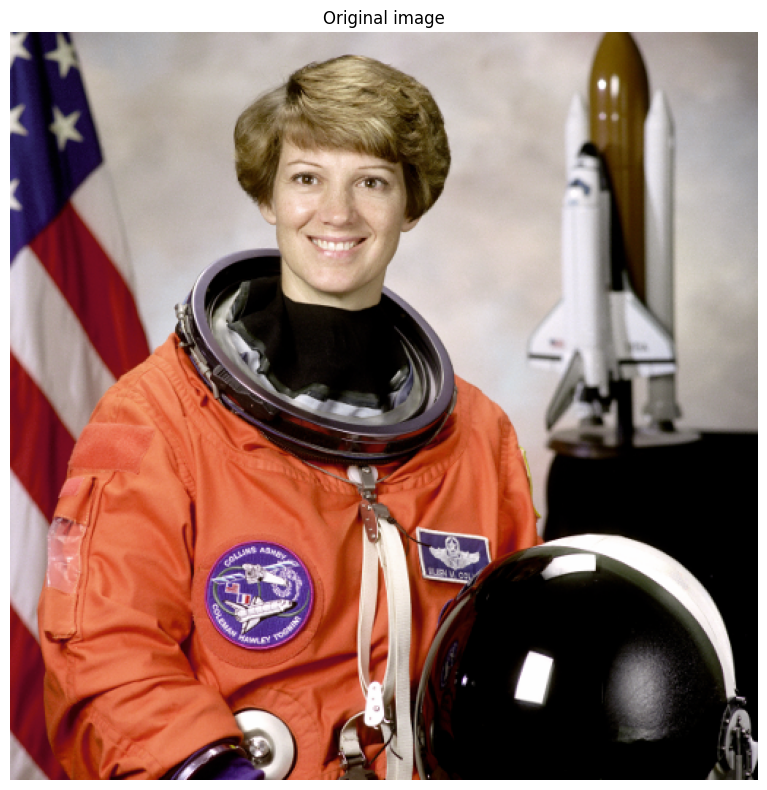

In [13]:
img = skimage.data.astronaut()

fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=True, sharey=True)
ax.imshow(img)
ax.set_title('Original image')
ax.set_axis_off()

plt.tight_layout()
plt.show()

##Question 1:

Use the SLIC function (https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.slic) to perform image segmentation. This function outputs a set of labels
(one per pixel). Display the image of labels.

SLIC number of segments: 390


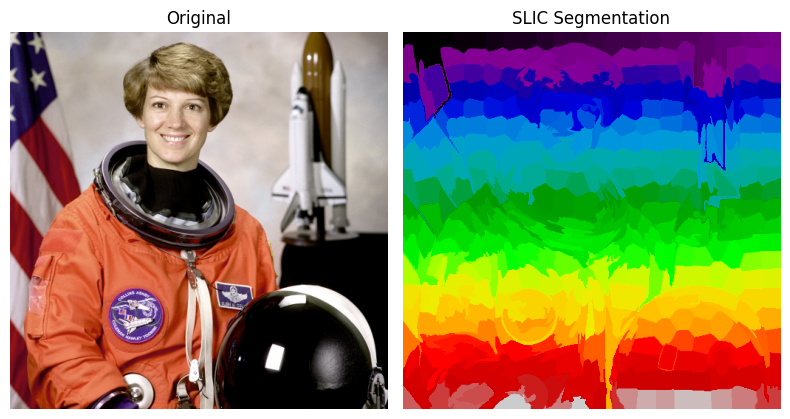

In [ ]:
segments_slic = slic(img, n_segments=500, compactness=10, sigma=1, start_label=1)
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')

# Setup for displaying the images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(segments_slic, cmap='nipy_spectral')
ax[1].set_title('SLIC Segmentation')

# Remove axis for a cleaner look
for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()

##Question 2:

Display the segmentation boundaries on top of the original image using the
mark_boundaries function (https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.mark_boundaries)

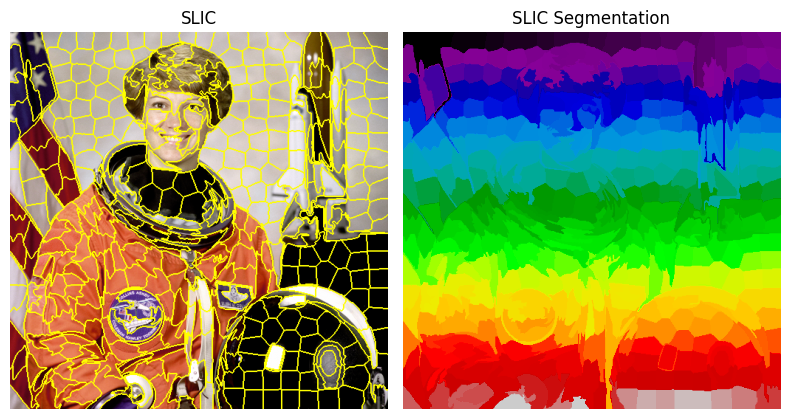

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax[0].imshow(mark_boundaries(img, segments_slic))
ax[0].set_title('SLIC')
ax[1].imshow(segments_slic, cmap='nipy_spectral')
ax[1].set_title('SLIC Segmentation')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

##Question 3:

Instead of displaying the labels, it might be more intuitive to display the segmentation
results as a quantized RBG image. This can be done using the label2rgb function
(https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.label2rgb).

Change the value of the parameters n_segments, compactness, sigma of the slic
function and assess their impact on the segmentation results.

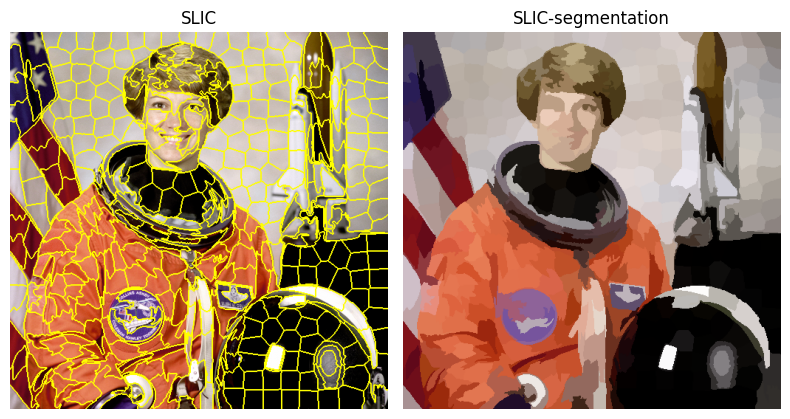

In [ ]:
out1 = color.label2rgb(segments_slic, img, kind='avg')
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax[0].imshow(mark_boundaries(img, segments_slic))
ax[0].set_title('SLIC')
ax[1].imshow(out1)
ax[1].set_title('SLIC-segmentation')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

## Question 4:

SLIC is good at pre-segmenting images, but it can return several small regions in
large homogeneous parts of the image. In such cases, further clustering is required.
We will now use NCut to further refine the image segmentation. First, we need to
define a region-based graph, i.e., a region adjacency graph (RAG).

Use the function rag_mean_color (https://scikit-image.org/docs/stable/api/skimage.graph.html#skimage.graph.rag_mean_color) to define a RAG.

In [ ]:
g = graph.rag_mean_color(img, segments_slic, mode='similarity',sigma=1.0)

## Question 5:

Visualise the graph created using the show_rag function (https://scikit-image org/docs/stable/api/skimage.graph.html#skimage.graph.show_rag).

Visualise the impact of the parameters of the rag_mean_color function.

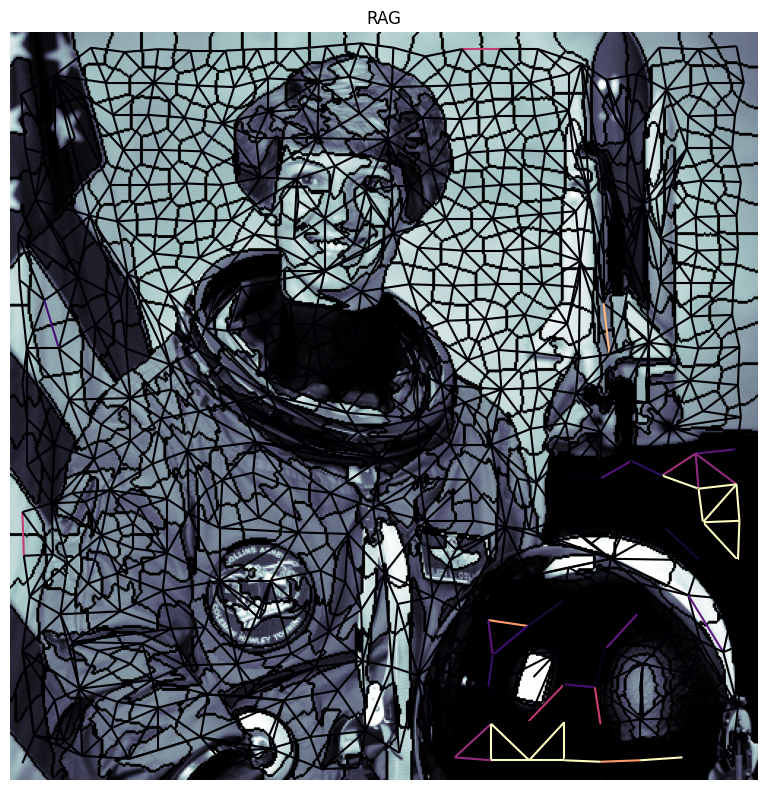

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=True, sharey=True)
lc = graph.show_rag(segments_slic, g, img, ax=ax)
ax.set_title('RAG')
ax.set_axis_off()

plt.tight_layout()
plt.show()

## Question 6:

Now that the graph is constructed, use the cut_normalized function (https://scikit-image.org/docs/stable/api/skimage.graph.html#skimage.graph.cut_normalized) to create a new list of labels and visualise the final
segmentation results. You might have to tune some of the parameters.

SLIC + NCut number of segments: 270


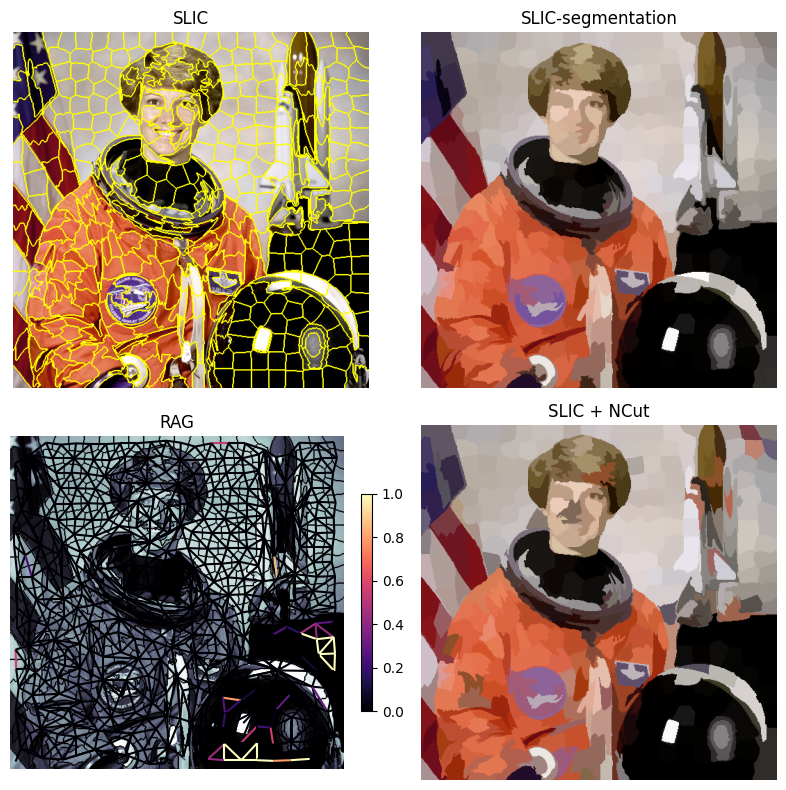

In [ ]:
labels2 = graph.cut_normalized(segments_slic, g, thresh=.1, num_cuts=40)
print(f'SLIC + NCut number of segments: {len(np.unique(labels2))}')
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')
ax[0, 1].imshow(out1)
ax[0, 1].set_title('SLIC-segmentation')
ax[1, 1].imshow(out2)
ax[1, 1].set_title('SLIC + NCut')
ax[1, 0].set_title('RAG')
lc = graph.show_rag(segments_slic, g, img, ax=ax[1,0])
fig.colorbar(lc, fraction=0.03, ax=ax[1,0])

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

## Question 7:

Compare the segmentation results to the naïve K-Means classifier.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


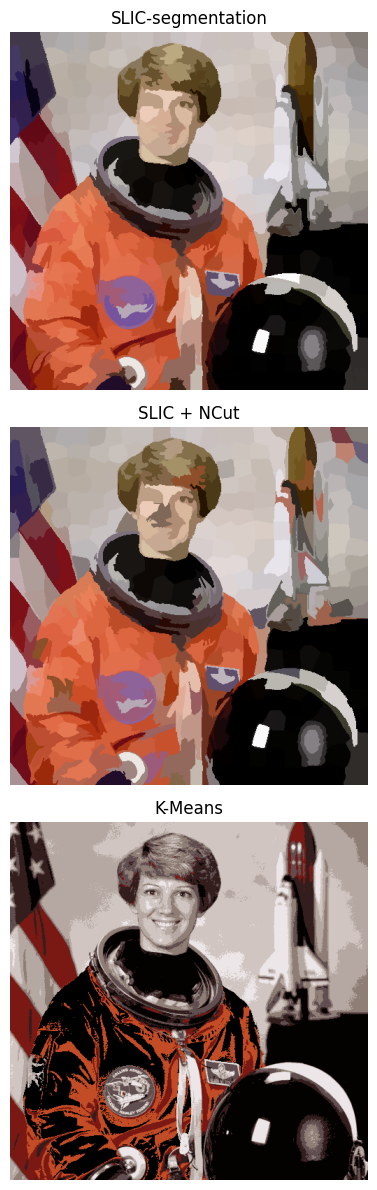

In [ ]:
pixels = img.reshape(-1, img.shape[-1])
# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42).fit(pixels)
cluster_labels = kmeans.labels_
# Reshape cluster labels back into the original image shape
kmeans_labels = cluster_labels.reshape(img.shape[:-1])

# Generate an RGB image from the k-means clustering labels
out_kmeans = color.label2rgb(kmeans_labels, img, kind='avg')

# Add the k-means image to the subplot for comparison
fig, ax = plt.subplots(3, 1, figsize=(8, 12), sharex=True, sharey=True)
ax[0].imshow(out1)
ax[0].set_title('SLIC-segmentation')
ax[1].imshow(out2)
ax[1].set_title('SLIC + NCut')
ax[2].imshow(out_kmeans)
ax[2].set_title('K-Means')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()